In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

Constraint: p_EP / p_EC * E + p_TP / p_TC * T < p_cap

# Setup timeframe

In [3]:
START_DATE = "2023-07-01"
END_DATE= "2023-09-30"

# Dati Parcheggi

In [79]:
statistiche_parcheggi_molveno_df = pd.read_parquet("datasets/molveno/statistiche_parcheggi_molveno.parquet", engine='pyarrow')

In [80]:
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df = statistiche_parcheggi_molveno_df[
        (statistiche_parcheggi_molveno_df["date"] >= START_DATE) & 
        (statistiche_parcheggi_molveno_df["date"] <= END_DATE)
    ]
statistiche_parcheggi_molveno_df = statistiche_parcheggi_molveno_df.astype(
        dict.fromkeys(statistiche_parcheggi_molveno_df.columns[:-1],"int")
    )

statistiche_parcheggi_molveno_df

Unnamed: 0,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
339,0,4,3,3,3,4,8,4,3,12,...,0,0,0,0,0,0,0,0,44,2023-07-01
340,4,0,0,1,2,0,1,0,2,2,...,2,11,0,0,0,0,0,0,32,2023-07-02
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-07-03
342,3,0,1,2,4,4,5,6,2,2,...,0,0,0,0,0,0,0,0,31,2023-07-04
343,2,2,3,2,5,4,15,5,8,7,...,0,0,0,1,0,0,0,0,63,2023-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0,0,1,0,0,1,6,2,2,1,...,0,0,0,0,0,0,0,0,14,2023-09-26
427,0,2,1,1,0,1,1,3,3,2,...,0,0,0,0,0,0,0,0,16,2023-09-27
428,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,2023-09-28
429,0,0,0,0,2,0,1,1,2,5,...,0,0,1,0,0,0,0,0,13,2023-09-29


In [81]:
statistiche_parcheggi_molveno_df.sum(numeric_only=True)

Unnamed: 0
20 MIN              327
40 MIN              407
1 ORA               802
1 ORA E 20 MIN     1009
1 ORA E 40 MIN     1177
2 ORE              1348
3 ORE              4011
4 ORE              3421
5 ORE              3373
6 ORE              3265
7 ORE              3028
8 ORE              1949
9 ORE               872
10 ORE              383
11 ORE              222
12 ORE              120
13 ORE               39
14 ORE               39
15 ORE               16
16 ORE               14
17 ORE               12
18 ORE                3
19 ORE                6
20 ORE               11
21 ORE                9
22 ORE               13
23 ORE               13
1 GIORNO             20
2 GIORNI            140
3 GIORNI             27
4 GIORNI             19
5 GIORNI             24
6 GIORNI             33
7 GIORNI             22
8 GIORNI             18
TOTALE            26192
dtype: int64

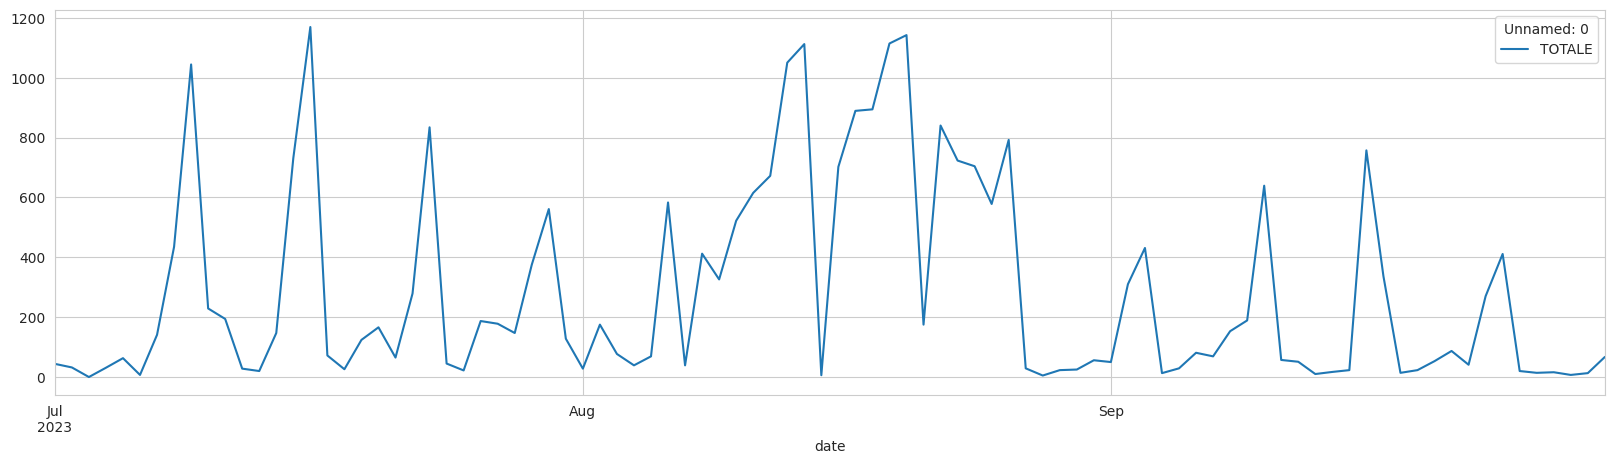

In [82]:
statistiche_parcheggi_molveno_df.plot(y=["TOTALE"], x="date", figsize=(20,5))
plt.show()

In [83]:
column_to_minutes = {
    '20 MIN': 20, 
    '40 MIN': 40, 
    '1 ORA': 60, 
    '1 ORA E 20 MIN': 80,
    '1 ORA E 40 MIN': 100, 
    '2 ORE': 120, 
    '3 ORE': 180, 
    '4 ORE': 240, 
    '5 ORE': 300, 
    '6 ORE': 360, 
    '7 ORE': 420, 
    '8 ORE': 480, 
    '9 ORE': 540, 
    '10 ORE': 600, 
    '11 ORE': 660, 
    '12 ORE': 720, 
    '13 ORE': 780, 
    '14 ORE': 840, 
    '15 ORE': 900, 
    '16 ORE': 960, 
    '17 ORE': 1020, 
    '18 ORE': 1080, 
    '19 ORE': 1140, 
    '20 ORE': 1200, 
    '21 ORE': 1260, 
    '22 ORE': 1320, 
    '23 ORE': 1380, 
    '1 GIORNO': 1440, 
    '2 GIORNI': 1440*2, 
    '3 GIORNI': 1440*3, 
    '4 GIORNI': 1440*4, 
    '5 GIORNI': 1440*5,
    '6 GIORNI': 1440*6, 
    '7 GIORNI': 1440*7, 
    '8 GIORNI': 1440*8
}

In [84]:
NORMALIZATION_FACTOR = 60*8

for c in column_to_minutes.keys():
    statistiche_parcheggi_molveno_df[c] = statistiche_parcheggi_molveno_df[c] * column_to_minutes[c] / NORMALIZATION_FACTOR
statistiche_parcheggi_molveno_df["TOTALE"] = statistiche_parcheggi_molveno_df[column_to_minutes.keys()].sum(axis=1)

In [85]:
statistiche_parcheggi_molveno_df

Unnamed: 0,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
339,0.000000,0.333333,0.375,0.500000,0.625000,1.00,3.000,2.0,1.875,9.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.708333,2023-07-01
340,0.166667,0.000000,0.000,0.166667,0.416667,0.00,0.375,0.0,1.250,1.50,...,6.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,89.875000,2023-07-02
341,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000,0.0,0.000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2023-07-03
342,0.125000,0.000000,0.125,0.333333,0.833333,1.00,1.875,3.0,1.250,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.166667,2023-07-04
343,0.083333,0.166667,0.375,0.333333,1.041667,1.00,5.625,2.5,5.000,5.25,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,42.875000,2023-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.000000,0.000000,0.125,0.000000,0.000000,0.25,2.250,1.0,1.250,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.500000,2023-09-26
427,0.000000,0.166667,0.125,0.166667,0.000000,0.25,0.375,1.5,1.875,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.833333,2023-09-27
428,0.000000,0.000000,0.125,0.166667,0.000000,0.00,0.375,0.0,0.000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.916667,2023-09-28
429,0.000000,0.000000,0.000,0.000000,0.416667,0.00,0.375,0.5,1.250,3.75,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,16.541667,2023-09-29


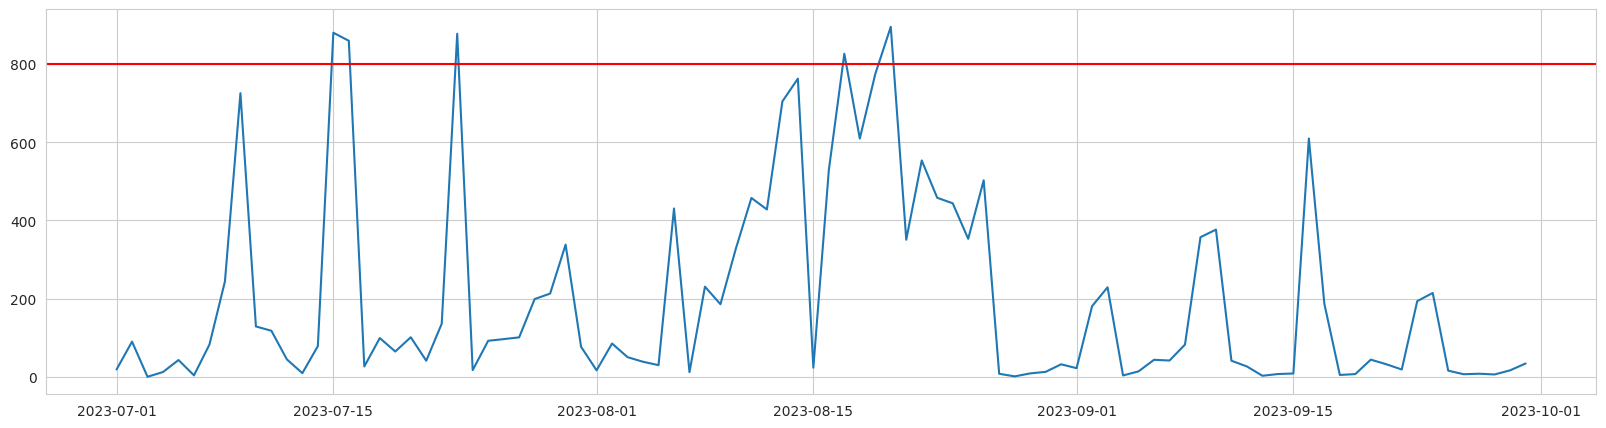

In [97]:
plt.figure(figsize=(20,5))
plt.plot(statistiche_parcheggi_molveno_df["date"], statistiche_parcheggi_molveno_df["TOTALE"])
plt.axhline(y=800, color='r', label="parcheggio pieno")
plt.show()